## Introduction to Python Exercises

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel → Restart) and then run all cells (in the menubar, select Cell → Run All).  You can speak with others regarding the assignment but all work must be your own. 


### This is a 30 point assignment graded from answers to questions and automated tests that should be run at the bottom. Be sure to clearly label all of your answers and commit final tests at the end. If you attempt to fake passing the tests you will receive a 0 on the assignment and it will be considered an ethical violation. (Note, not all questions have tests).


In [70]:
NAME = "Christian Kapp"
COLLABORATORS = ["Nick Esposito"]  #You can speak with others regarding the assignment, but all typed work must be your own.

In [71]:
# If you have trouble loading your unittests below, 
#!conda config --add channels conda-forge

In [72]:
#!conda install --yes ipython_unittest

### This Loads a Testing Array 
- This runs tests against your b array.  If you complete the assingment correctly, you will pass the tests. 
- **If you attempt to fake passing the tests you will receive a 0 on the assignment and it will be considered an ethical violation.**

In [73]:
%load_ext ipython_unittest
#This runs tests against your b array.  If you complete the assingment correctly, you will pass the tests. 

The ipython_unittest extension is already loaded. To reload it, use:
  %reload_ext ipython_unittest


## Exercises - For and If.

(1). Write a program which create a list called `fivetoten` of all numbers from 5 to 10 (inclusive).




In [74]:
fivetoten =[x for x in range(5,11,1)]
fivetoten

[5, 6, 7, 8, 9, 10]

(2). Write a program which uses a for loop and if statements to create a list called `divby7` of all numbers from 1-50 that are divisible by 7.
Hint: 14 is divisible by 7 if 14%7==0.

In [75]:
divby7 = [x for x in range(1,51,1) if x%7==0]
divby7

[7, 14, 21, 28, 35, 42, 49]

(3). Write a program which uses a for loop and if statements create a list `divby7not5` of all numbers which are divisible by 7 but are not a multiple of 5, between 10000 and 10100 (both included). 


In [76]:
divby7not5 = [x for x in range(10000, 10101, 1) if x%7==0 and x%5!=0]
divby7not5

[10003, 10017, 10024, 10031, 10038, 10052, 10059, 10066, 10073, 10087, 10094]

## Exercises - Functions

(4). Create a function `divby2` that accepts a list and returns all values from that list that are divisible by 2.  For example, passing the list  `numbers = [3, 12, 91, 33, 21, 34, 54, 34, 34, 54]` should return a list. Generate a new list `divby2` that includes only numbers that are divisible by 2. 

In [77]:
def divby2(y):
    y = [x for x in y if x%2==0]
    return(y)

In [78]:
#Execute this code to assign divby2 to the correct values. 
numbers = [3, 12, 91, 33, 21, 34, 54, 34, 34, 54]
divby2=divby2(numbers)
print(divby2)



[12, 34, 54, 34, 34, 54]


(5) Create an external module for your `divby2` function called `myutilities.py`.  Import myutilities as mu, such that that following runs.



In [79]:
#After importing this should work. (Feel free to add code to reimport)
import myutilities as mu
divby2mod=mu.divby2(numbers)

## Exercises-Titanic

The following exercises will use the titanic data from Kaggle.  I've included it in the input folder just like Kaggle. 

In [80]:
import numpy as np 
import pandas as pd 

# Input data files are available in the "../input/" directory.
# Let's input them into a Pandas DataFrame
train = pd.read_csv("../input/train.csv")
test  = pd.read_csv("../input/test.csv")



(6). While we can submit our answer to Kaggle to see how it will perform, we can also utilize our test data to assess accuracy. Accuracy is the percentage of predictions made correctly-i.e., the percentage of people in which our prediction regarding their survival. <br>Create columns in the training dataset `PredEveryoneDies` and `PredGender` with the same predictions which were included in the example notebook (06-intro-kaggle-baseline in the materials repository).   
  



In [81]:
#6
#PredEveryoneDies
train['PredEveryoneDies'] = 0

#PredGender
train.loc[train['Sex'] == 'male', 'PredGender'] = 0
train.loc[train['Sex'] == 'female', 'PredGender'] = 1

(7) Create variables `AccEveryoneDies` and `AccGender` using a calculation of accuracy of predictions for the `training` dataset.  

In [82]:
#AccEveryoneDies
train['AccEveryoneDies'] = 0
train.loc[train['PredEveryoneDies']==train['Survived'], 'AccEveryoneDies'] = 1
trainstats=train.describe()
AccEveryoneDies = trainstats.AccEveryoneDies['mean'] * 100
AccEveryoneDies

61.616161616161612

In [83]:
#AccGender
train['AccGender'] = 0
train.loc[train['PredGender']==train['Survived'], 'AccGender']=1
trainstats=train.describe()
AccGender = trainstats.AccGender['mean'] * 100
AccGender

78.675645342312009

(8). Notice how we are utilizing the code to select out the `passengerID` and the `Survived` column and generating a submission file over and over? This is in need of a function.  Create a `generate_submission` function that accepts a DataFrame, a target column, and a filename and writes out the submission file with just the `passengerID` and the `Survived` columns, where the survived column is equal to the target column. It should then return a DataFrame with the `passengerID` and the `Survived` columns.

Executeing the following:
`submitdie = generate_submission(train, 'PredEveryoneDies', 'submiteveryonedies.csv')`

Should return a dataframe with just `passengerID` and the `Survived` column.  




In [84]:
def generate_submission(dataframe, target, file_name):
    submission = dataframe.loc[:,['PassengerId', target]]
    submission.columns = ['PassengerId', 'Survived']
    submission.to_csv(file_name, index=False)
    return(submission)

submitdie = generate_submission(train, 'PredEveryoneDies', 'submiteveryonedies.csv')


(9). In accordance to the [women and children first](https://en.wikipedia.org/wiki/Women_and_children_first) protocol, we hypothesize that our model could be improved by including whether the individual was a child in addition to gender.  *After* coding survival based on gender, update your recommendation to prediction in the training dataset survival based on age. <br> <br>

In other words, your model should predict that a male child would survive.  

`train['PredGenderAge13']` should be the prediction incorporating both Gender and whether Age <  13.
`train['PredGenderAge18']` should be the prediction incorporating both Gender and whether Age <  18.
`AccGenderAge13` should be the accuracy of the age prediction, based on `train['PredGenderAge13']`. 
`AccGenderAge18` should be the accuracy of the age prediction, based on `train['PredGenderAge18']`.




In [85]:
#PredGenderAge13 & #AccGenderAge13
train['PredGenderAge13'] = 0
train['PredGenderAge13'] = train['PredGender']
train.loc[train['Age']<13, 'PredGenderAge13']=1
train['AccGenderAge13'] = 0
train.loc[train['PredGenderAge13']==train['Survived'], 'AccGenderAge13']=1
trainstats=train.describe()
AccGenderAge13 = trainstats.AccGenderAge13['mean'] * 100
AccGenderAge13

79.236812570145901

In [86]:
#PredGenderAge18 & #AccGenderAge18
train['PredGenderAge18'] = 0
train['PredGenderAge18'] = train['PredGender']
train.loc[train['Age']<18, 'PredGenderAge18']=1
train['AccGenderAge18'] = 0
train.loc[train['PredGenderAge18']==train['Survived'], 'AccGenderAge18']=1
trainstats=train.describe()
AccGenderAge18 = trainstats.AccGenderAge18['mean'] * 100
AccGenderAge18

77.328843995510667

(10). Create a prediction file for the "women and children first" model in column` PredGenderAge13` and upload it to Kaggle.  Take a screen shot of your position. Put that screenshot in this repository and use markdown to show your results in the cell below.  The syntax for including a markdown picture is shown below.  

```
![]myscreenshot.png
```

In [87]:
test.loc[test['Sex'] == 'male', 'PredGender'] = 0
test.loc[test['Sex'] == 'female', 'PredGender'] = 1
test['PredGenderAge13'] = 0
test['PredGenderAge13'] = test['PredGender']
test.loc[test['Age']<13, 'PredGenderAge13']=1
submitWomenAndChildren = generate_submission(test, 'PredGenderAge13', 'submitWomenAndChildrenFirst.csv')

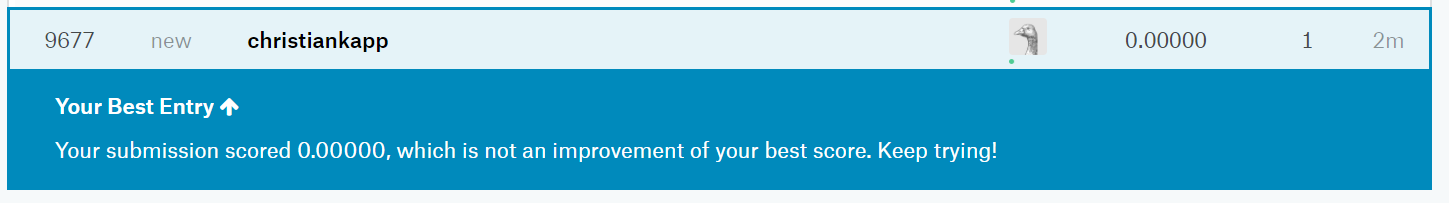KaggleScreenshot.png

(11). You should find that the AccGenderAge13 is better than AccGenderAge18. Create a new column `child` in the test and train DataFrames that is 1 if Age <  13 and 0 otherwise.  This is a *feature*.  We will talk more about features next time.  




In [88]:
#11
train['child'] = 0
train.loc[train['Age']<13, 'child']=1

test['child'] = 0
test.loc[test['Age']<13, 'child']=1

In [89]:
%%unittest_main
class TestExercise3(unittest.TestCase):
    def test_forif1(self):
        self.assertTrue(fivetoten == [5,6,7,8,9,10])
    def test_forif2(self):
        self.assertTrue(divby7 == [7,14,21,28,35,42,49])
    def test_forif(self):
        self.assertTrue(divby7not5 == [10003, 10017, 10024, 10031, 10038, 10052, 10059, 10066, 10073, 10087, 10094])
    def test_functions(self):
        self.assertTrue(divby2 == [12, 34, 54, 34, 34, 54])
    def test_functions(self):
        self.assertTrue(divby2mod == [12, 34, 54, 34, 34, 54])
    def test_titanic1(self):
        self.assertAlmostEqual(AccEveryoneDies, 61.6161616162)
    def test_titanic2(self):
        self.assertAlmostEqual(AccGender, 78.6756453423)
    def test_titanic3(self):
        self.assertAlmostEqual(train['PredEveryoneDies'].mean(), 0.0)
    def test_titanic4(self):
        self.assertAlmostEqual(train['PredGender'].mean(), 0.35241301908)
    def test_titanic5(self):
        self.assertTrue(['PassengerId', 'Survived']==list(pd.read_csv('submiteveryonedies.csv').columns.values))
    def test_titanic6(self):
        self.assertAlmostEqual(train['PredGenderAge13'].mean(), 0.393939393939)
    def test_titanic7(self):
        self.assertAlmostEqual(train['PredGenderAge18'].mean(), 0.417508417508)
    def test_titanic8(self):
        self.assertAlmostEqual(AccGenderAge13, 79.2368125701)
    def test_titanic9(self):
        self.assertAlmostEqual(AccGenderAge18, 77.3288439955)
    def test_titanic10(self):
        self.assertTrue(train['child'].sum()==69)
    def test_titanic11(self):
        self.assertTrue(test['child'].sum()==25)

Success

...............
----------------------------------------------------------------------
Ran 15 tests in 0.004s

OK


<unittest.runner.TextTestResult run=15 errors=0 failures=0>

In [90]:
#This is a collection of all of the tests from the exercises above. 